In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
electricity=pd.read_csv(r'C:\Users\nagar\Documents\python files\Machine Learning\ML project\Project 3\Electricity Consumption.csv')

In [3]:
electricity.rename(columns={'Electricty_Consumption_in_TW':'tw','DATE':'date'},inplace=True)

In [4]:
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   tw      561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [5]:
electricity.date=pd.to_datetime(electricity.date)

In [6]:
electricity.set_index(electricity.date,inplace=True)

In [7]:
electricity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
 1   tw      561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


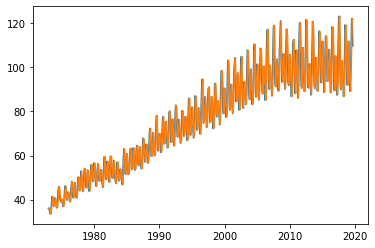

In [8]:
plt.Figure(figsize=(15,15))
plt.plot(electricity.tw)
plt.plot(electricity.tw.shift(1))
plt.show()

In [9]:
electricity['diff1']=electricity['tw'].diff().diff()
electricity['diff2']=electricity['tw'].diff().diff().diff()
electricity['diff3']=electricity['tw'].diff().diff().diff()
electricity['diff4']=electricity['tw'].diff().diff().diff().diff()

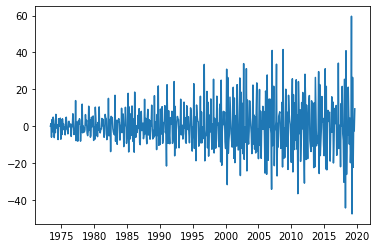

In [10]:
plt.plot(electricity.diff4)

In [11]:
ele=pd.read_csv(r'C:\Users\nagar\Documents\python files\Machine Learning\ML project\Project 3\Electricity Consumption.csv')

In [12]:
ele.rename(columns={'Electricty_Consumption_in_TW':'tw','DATE':'date'},inplace=True)
ele.date=pd.to_datetime(ele.date)
ele.set_index(ele.date,inplace=True)

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
decom=seasonal_decompose(ele.tw)

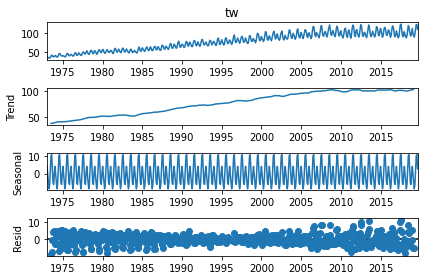

In [15]:
decom.plot()
plt.show()

In [16]:
#cheking the stationarity of the data using adf test

In [17]:
from statsmodels.tsa.stattools import adfuller

In [30]:
def stationary(x):
    output=pd.Series(adfuller(x)[0:4],
     index=['test','p_value','lags_used','number_of_obs'])
    return output

In [31]:
stationary(electricity.diff1.dropna())

test            -1.200565e+01
p_value          3.268689e-22
lags_used        1.800000e+01
number_of_obs    5.400000e+02
dtype: float64

In [34]:
#checking the stationarity of the data
stationary(electricity.tw)

test              -1.740593
p_value            0.410328
lags_used         15.000000
number_of_obs    545.000000
dtype: float64

In [65]:
#importing the time series libraries and evaluation metrics
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [74]:
#splitting the data into training and testing data
train1=electricity.tw[:450]
test1=electricity.tw[450:]

# Explonential Time Series analysis

In [147]:
exsm=ExponentialSmoothing(train1,trend='add',seasonal='add',seasonal_periods=12)
exsm=exsm.fit()

In [86]:
forc_exsm=exsm.forecast(111)

In [87]:
mean_absolute_error(test,forc_exsm)

5.099370362478755

In [89]:
mean_absolute_percentage_error(test,forc_exsm)

0.05084310439902786

In [90]:
mean_squared_error(test,forc_exsm)

37.60681473118661

In [88]:
#the eta model is giving better accuracy in the prediction tested against the test data

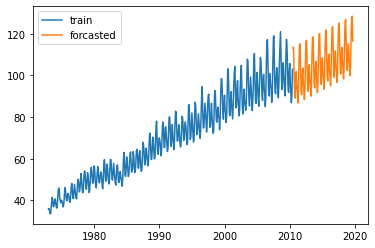

In [103]:
plt.Figure(figsize=(20,10))
plt.plot(train)
plt.plot(forc_exsm)
plt.legend(['train','forcasted'])
plt.show()

In [184]:
#predicting for the mext 2 years
exsm_for_two_years=exsm.forecast(24)

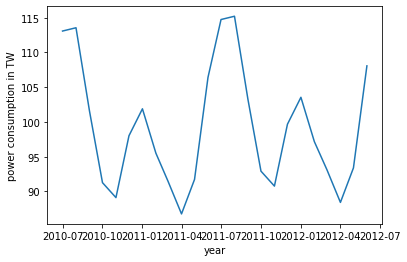

In [187]:
plt.Figure(figsize=(12,5))
plt.plot(exsm_for_two_years)
plt.xlabel('year')
plt.ylabel('power consumption in TW')
plt.show()

The power consumption for next 2 years however, will there may be a slight higher consumption in the second year than the first year from now.

# ARIMA

In [148]:
ari=ARIMA(train,order=(2,2,1))

In [149]:
ari=ari.fit()

In [98]:
forc_arima=ari.forecast(111)

In [106]:
print(mean_absolute_error(test,forc_arima),mean_absolute_percentage_error(test,forc_arima),mean_squared_error(test,forc_arima))

10.898448921924642 0.11226310793758916 167.71515443659433


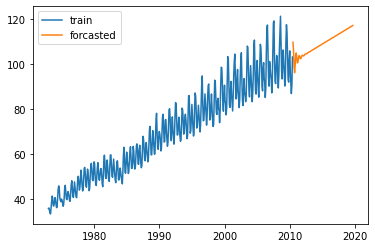

In [109]:
plt.Figure(figsize=(20,10))
plt.plot(train)
plt.plot(forc_arima)
plt.legend(['train','forcasted'])
plt.show()

In [113]:
#iterating over the all posible values of p,d,q
import itertools

In [233]:
p_range=range(0, 6)
d_range=range(0, 3)
q_range=range(0, 6)
order_list,error_list=[],[]
for p in p_range:
    for d in d_range:
        for q in q_range:
            order=(p,d,q)
            model=ARIMA(train,order=order)
            model_fit=model.fit()
            forecast=model_fit.forecast(len(test))
            mae=mean_absolute_error(forecast, test)
            order_list.append(order)
            error_list.append(mae)

In [234]:
arima_parameter=pd.DataFrame(order_list,error_list)

In [235]:
arima_parameter.sort_index()

,0,1,2
4.852613,4,1,3
4.855642,3,1,2
4.857984,2,1,3
4.869870,3,1,3
4.869894,2,1,2
...,...,...,...
267.815893,3,2,0
436.851179,2,2,0
695.631884,0,2,0
789.647736,0,2,1


In [237]:
#The final p,d,q values for this arima model is 4,1,3 with the mean absolute error of 4.852613

In [238]:
final_arima=ARIMA(train,order=(4,1,3))
final_arima_model=final_arima.fit()

In [239]:
arima_final_forcast=final_arima_model.forecast(len(test))

In [240]:
print(f'Mean absolute percentage error:{mean_absolute_percentage_error(test,arima_final_forcast)}, mean sqaured error : {mean_squared_error(test,arima_final_forcast)}')

Mean absolute percentage error:0.04655038161206735, mean sqaured error : 37.10010325695303


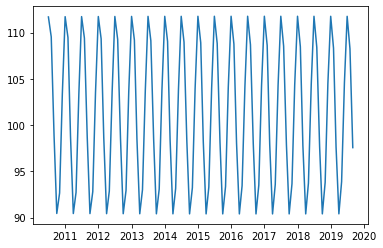

In [253]:
plt.plot(arima_final_forcast)

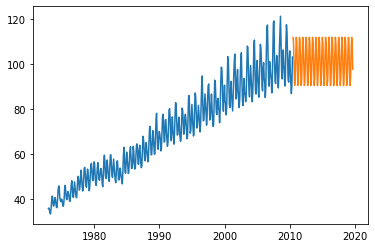

In [241]:
plt.plot(train)
plt.plot(arima_final_forcast)
plt.show()

In [243]:
#forecasting the data the for next 2 year using ARIMA model
arima_for_2_year=final_arima_model.forecast(24)

In [244]:
arima_for_2_year

2010-07-01    111.687698
2010-08-01    109.539823
2010-09-01     98.871744
2010-10-01     90.447379
2010-11-01     92.656312
2010-12-01    103.329165
2011-01-01    111.720198
2011-02-01    109.471738
2011-03-01     98.796549
2011-04-01     90.439254
2011-05-01     92.727083
2011-06-01    103.404538
2011-07-01    111.727958
2011-08-01    109.400937
2011-09-01     98.721299
2011-10-01     90.431885
2011-11-01     92.797923
2011-12-01    103.479658
2012-01-01    111.734940
2012-02-01    109.330056
2012-03-01     98.646314
2012-04-01     90.425283
2012-05-01     92.868850
2012-06-01    103.554502
Freq: MS, Name: predicted_mean, dtype: float64

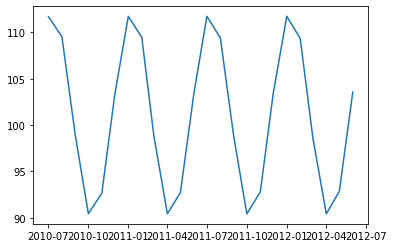

In [245]:
plt.plot(arima_for_2_year)
plt.show()

The ARIMA model suggests that the next 2 year consumption of electricty(in TW) will be no change in the consumption. 

# SARIMAX

In [247]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [248]:
sari=SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,0,12))
sari_model=sari.fit()

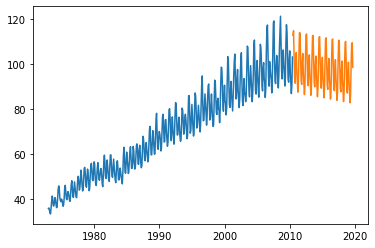

In [255]:
plt.plot(train)
plt.plot(sari_model.forecast(len(test)))


In [251]:
#the model without any hyperparameter tuning shows that, on the testing data, the trend will be in negative. 
#Opposit to original data

In [252]:
mean_absolute_error(test,sari_model.forecast(len(test)))

4.628797166866645

In [266]:
#Iterating over the orders and seasonal orders

In [ ]:
sari_order=list(itertools.product([0,1,2],[0,1,2],[0,1,2]))
seasonal_order=[(x[0],x[1],x[2],12) for x in itertools.product([0,1,2],[0,1,2],[0,1,2])]

aic_score=[]
param=[]
seasoanl_param=[]
best_result=[]


for i in sari_order:
    for j in seasonal_order:
        temp=SARIMAX(train,order=i,seasonal_order=j,enforce_stationarity=False,enforce_invertibility=False)
        temp_model=temp.fit(disp=False)
        aic_score.append(temp_model.aic)
        param.append(i)
        seasoanl_param.append(j)
        

        


In [297]:
best_sarima=pd.DataFrame(param,seasoanl_param,aic_score)

In [298]:
best_sarima['score']=aic_score
best_sarima['order']=param
best_sarima['seasonal_order']=seasoanl_param

In [300]:
best_sarima.sort_values(by='score')

,score,order,seasonal_order
143,1536.722518,"(0, 1, 2)","(0, 2, 2, 12)"
386,1536.931909,"(1, 1, 2)","(0, 2, 2, 12)"
305,1537.020581,"(1, 0, 2)","(0, 2, 2, 12)"
629,1537.062137,"(2, 1, 2)","(0, 2, 2, 12)"
548,1538.773760,"(2, 0, 2)","(0, 2, 2, 12)"
...,...,...,...
2,3892.836557,"(0, 0, 0)","(0, 0, 2, 12)"
54,3973.391050,"(0, 0, 2)","(0, 0, 0, 12)"
1,4461.286882,"(0, 0, 0)","(0, 0, 1, 12)"
27,4530.683973,"(0, 0, 1)","(0, 0, 0, 12)"


In [301]:
#fitiing the best paramters into the SARIMAX

In [302]:
final_sarima=SARIMAX(train,order=(0,1,2),seasonal_order=(0,2,2,12))
final_sarima_model=final_sarima.fit()

In [303]:
sarima_forecast=final_arima_model.forecast(len(test))

In [310]:
mean_absolute_error(test,sarima_forecast)

4.852613361904746

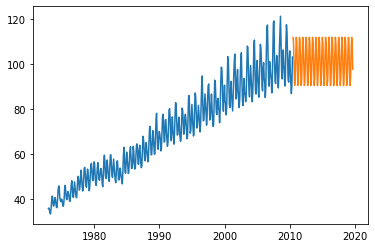

In [305]:
plt.plot(train)
plt.plot(sarima_forecast)

In [306]:
#forecasting for next 24 months

In [307]:
next_24_month_Sarima=final_arima_model.forecast(24)

Text(0, 0.5, 'power consumption in TW')

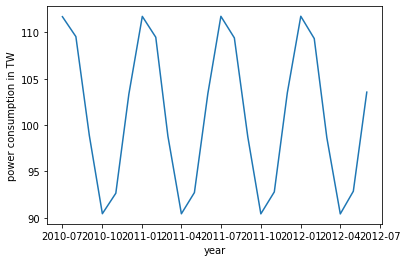

In [311]:
plt.plot(next_24_month_Sarima)
plt.xlabel('year')
plt.ylabel('power consumption in TW')

In [309]:
#in the next 2 years, the SARIMAX model shows that their is no increase or decrease in the demand of the power(in TW)

Out of three timeseries models, the exponential smoothning model has captured the past data and forecasted with better accuracy. Giving the best forecasting among all by showing the increase in the consumption of the power (in TW) in the next 2 years. Whereas, ARIMA and SARIMAX forecasted the consumption as sideways.
 
 Hence, the best model for forecasting is the Explonential smoothing.